<a href="https://colab.research.google.com/github/Alankaar63/Data-Analysis-With-Python/blob/main/mediumproj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 rows of data
n_rows = 100

# Random sizes between 800 and 2500 square feet
size = np.random.randint(800, 2501, size=n_rows)

# Random bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, size=n_rows)

# Calculate price with a linear relationship + some noise
price = (0.2 * size) + (20 * bedrooms) + 50 + np.random.normal(0, 30, size=n_rows)

# Create DataFrame
df = pd.DataFrame({
    "Size": size,
    "Bedrooms": bedrooms,
    "Price": price
})

# Round Price to 2 decimal places for readability
df["Price"] = df["Price"].round(2)

# Sort by Size for a cleaner look (optional)
df = df.sort_values("Size").reset_index(drop=True)

# Display the first few rows
print(df.head())
print(f"Total rows: {len(df)}")

   Size  Bedrooms   Price
0   813         4  291.84
1   820         4  311.01
2   821         4  286.10
3   834         4  271.38
4   887         5  269.20
Total rows: 100


In [2]:
df.head()

,Size,Bedrooms,Price
0,813,4,291.84
1,820,4,311.01
2,821,4,286.10
3,834,4,271.38
4,887,5,269.20


In [3]:
X = df.drop('Price',axis=1)
y = df['Price']

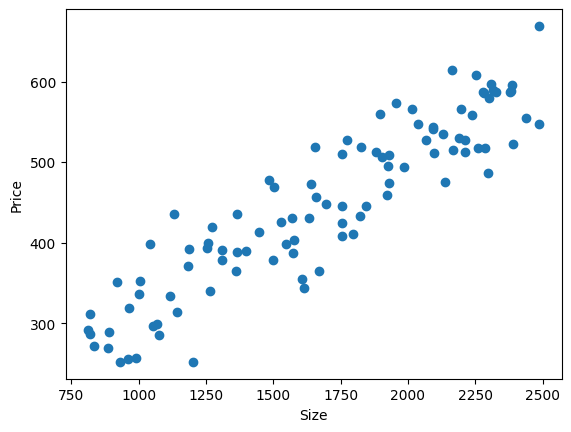

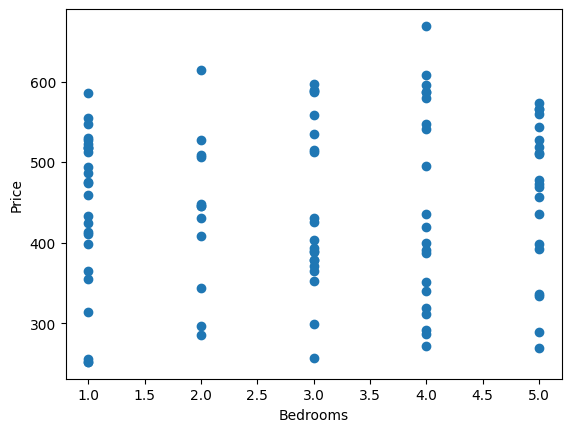

In [4]:
for column in X.columns:
    plt.scatter(X[column],y)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
X_train_sorted = X_train.sort_values('Size')
print(X_train_sorted)

    Size  Bedrooms
1    820         4
2    821         4
3    834         4
5    891         5
6    921         4
..   ...       ...
95  2385         4
96  2390         1
97  2438         1
98  2485         4
99  2487         1

[80 rows x 2 columns]


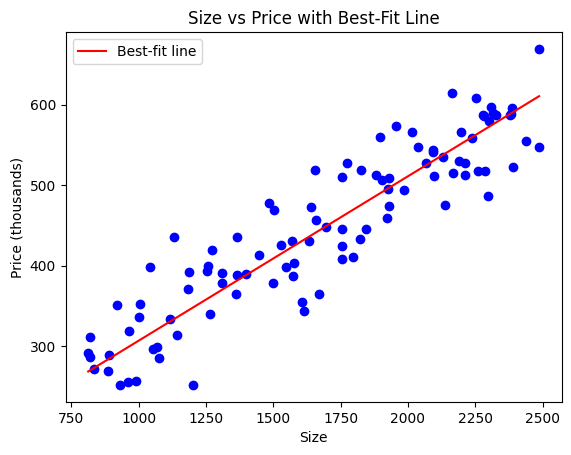

In [8]:
plt.scatter(X['Size'], y, c='b')
size_range = np.linspace(X['Size'].min(), X['Size'].max(), 100)

bedrooms_mean = X['Bedrooms'].mean()
X_predict = pd.DataFrame({
    'Size': size_range,
    'Bedrooms': [bedrooms_mean] * 100
})

# Predict Prices for the line
y_line = lr.predict(X_predict)

# Plot the best-fit line
plt.plot(size_range, y_line, c='r', label='Best-fit line')

plt.xlabel('Size')
plt.ylabel('Price (thousands)')
plt.title('Size vs Price with Best-Fit Line')
plt.legend()
plt.show()

In [12]:
import numpy as np
import plotly.graph_objects as go

def loss_function(m, b):
    return m**2 + b**2

m_values = np.linspace(-2, 2, 30)
b_values = np.linspace(-2, 2, 30)
m, b = np.meshgrid(m_values, b_values)
loss = loss_function(m, b)

dw1 = 2 * m
dw2 = 2 * b

fig = go.Figure()

fig.add_trace(go.Surface(z=loss, x=m, y=b, colorscale='viridis', opacity=0.8))

for i in range(0, m.shape[0], 4):
    for j in range(0, b.shape[1], 4):
        fig.add_trace(go.Cone(
            x=[m[i, j]], y=[b[i, j]], z=[loss[i, j]],
            u=[-dw1[i, j]], v=[-dw2[i, j]], w=[-1],
            colorscale='reds', sizemode="absolute", sizeref=0.5
        ))

fig.update_layout(
    title='3D Loss Surface with Gradient Descent Slope',
    scene=dict(
        xaxis_title='m',
        yaxis_title='b',
        zaxis_title='Loss'
    )
)

fig.show()
